Benchmark of VisiumHD dataset

In [1]:
import os,sys
sys.path.append(os.path.realpath(os.path.join(os.getcwd(), '..')))
import warnings
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from MuCoSTX.config import config
opt = config()
args = opt.parse_args(['--gpu', '0'])
args.dataset_path = '/mnt/d/Dataset/SRT_Dataset/1-DLPFC/'
args.cluster = 7
if args.version.split('-')[0] != 'dev':
    warnings.filterwarnings("ignore")
args

Namespace(amp=True, batch_size=512, cluster=7, clusters=0, dataset_path='/mnt/d/Dataset/SRT_Dataset/1-DLPFC/', dropout=0.3, flow='source_to_target', gpu=0, hvgs=3000, latent_dim=64, log_file='../Log', log_steps=20, lr=0.001, max_epoch=100, max_neighbors=6, mode_rknn='rknn', n_spot=0, out_file='../Output', project_name='MoCoSTX', seed=2024, srt_resolution=150, tau=0.05, version='dev-1.0', visual=True, wegiht_decay=0.0001)

In [3]:
from MuCoSTX.utils import set_random_seed
set_random_seed(args.seed)

In [4]:
sections = ['151507', '151508', '151509', '151510','151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']

In [5]:
adata_list = []
for section in sections:
    adata = sc.read_visium(os.path.join(args.dataset_path+section))
    Ann_df = pd.read_csv(os.path.join(args.dataset_path+'1-DLPFC_annotations/', section+'_truth.txt'), sep='\t', header=None, index_col=0)
    Ann_df.columns = ['Ground Truth']
    adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'Ground Truth']
    adata_list.append(adata)

/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are n

In [6]:
from  MuCoSTX.mucostx import MuCoSTX
mx = MuCoSTX(adata_list, args)

Data(x=[47632, 3001], edge_index=[2, 277466]) Data(x=[47632, 3001], edge_index=[2, 1468266], edge_attr=[1468266])


  0%|          | 0/100 [00:00<?, ?it/s]

x dim 502, running loss: 6006.871212005615
x dim 505, running loss: 5139.561241149902
x dim 502, running loss: 4457.438831329346
x dim 510, running loss: 3882.261215209961
x dim 492, running loss: 3386.3830528259277
x dim 504, running loss: 2959.788709640503
x dim 480, running loss: 2589.7443675994873
x dim 490, running loss: 2267.9337940216064
x dim 501, running loss: 1986.7650394439697
x dim 496, running loss: 1745.3398876190186
x dim 500, running loss: 1531.9742002487183
x dim 499, running loss: 1348.0017175674438
x dim 506, running loss: 1185.8360891342163
x dim 487, running loss: 1045.1515712738037
x dim 501, running loss: 921.699688911438
x dim 504, running loss: 813.8553419113159
x dim 504, running loss: 720.5092701911926
x dim 506, running loss: 638.1224503517151
x dim 508, running loss: 566.2823348045349
x dim 508, running loss: 504.21454524993896
x dim 492, running loss: 450.0972170829773
x dim 502, running loss: 402.3530025482178
x dim 494, running loss: 361.18224835395813
x

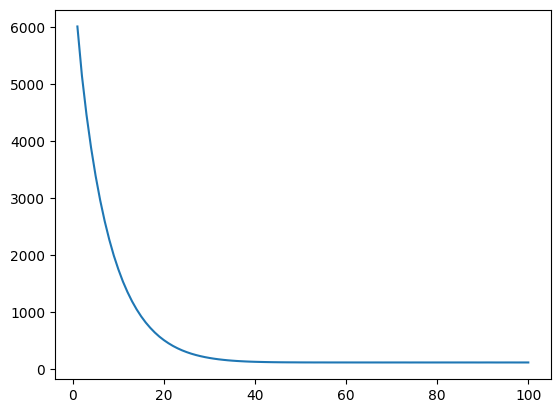

In [7]:
mx.train_emb()

Downstream workflow

In [8]:
list_new = mx.get_adata_all()
list_new

[AnnData object with n_obs × n_vars = 4218 × 3000
     obs: 'in_tissue', 'array_row', 'array_col', 'Ground Truth', 'n_genes'
     var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
     uns: 'spatial', 'hvg', 'log1p'
     obsm: 'spatial', 'mx',
 AnnData object with n_obs × n_vars = 4378 × 3000
     obs: 'in_tissue', 'array_row', 'array_col', 'Ground Truth', 'n_genes'
     var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
     uns: 'spatial', 'hvg', 'log1p'
     obsm: 'spatial', 'mx',
 AnnData object with n_obs × n_vars = 4784 × 3000
     obs: 'in_tissue', 'array_row', 'array_col', 'Ground Truth', 'n_genes'
     var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
     uns: 'spatial', 'hvg'

In [9]:
# save_dir = args.dataset_path+'adata_all/'
# os.makedirs(save_dir, exist_ok=True)

   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


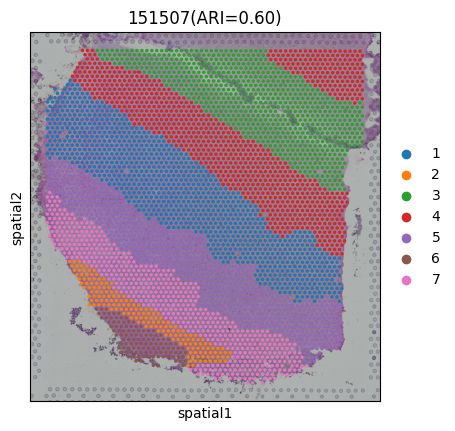

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


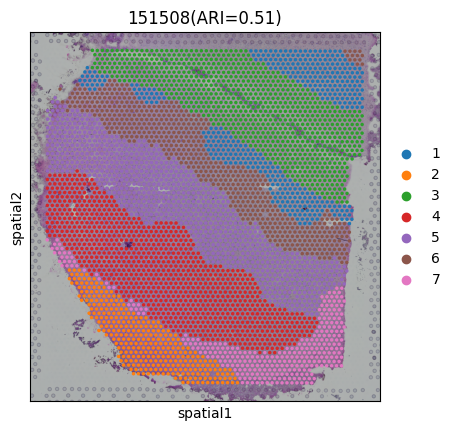

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


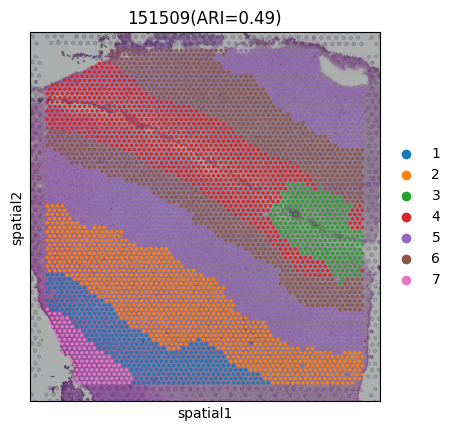

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


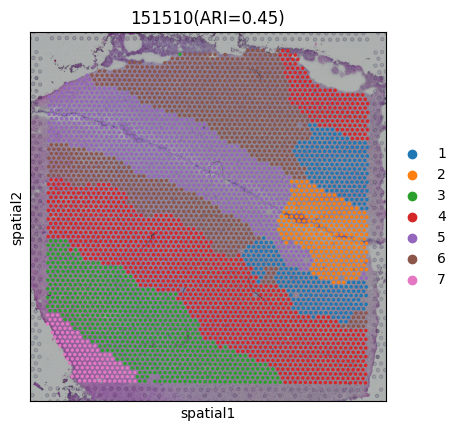

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


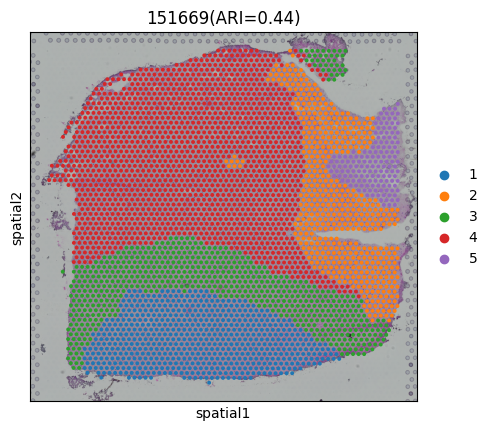

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


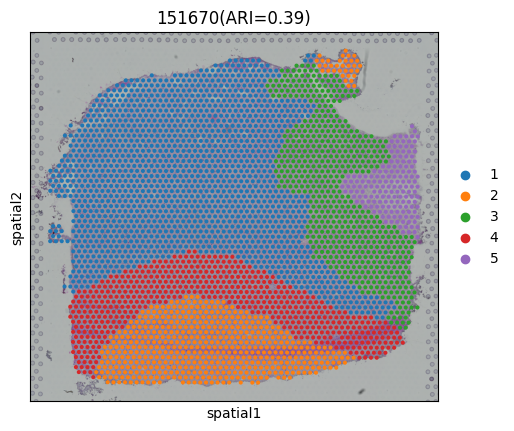

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


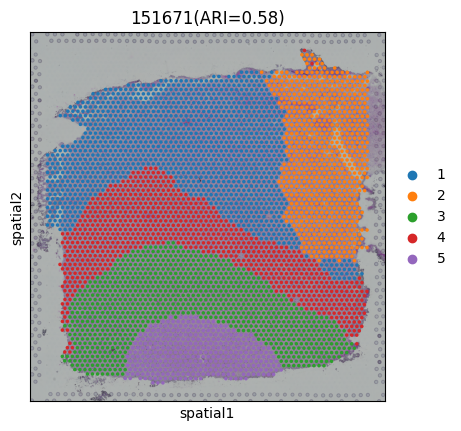

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


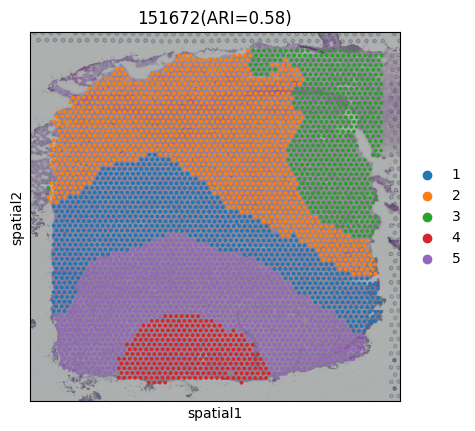

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


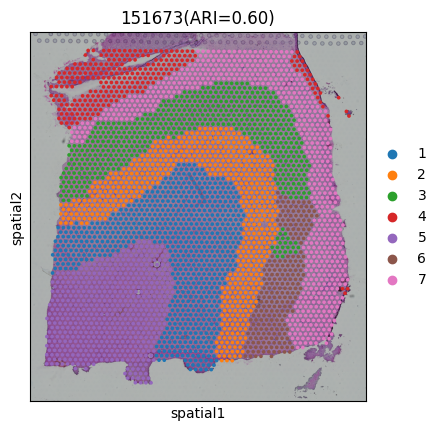

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


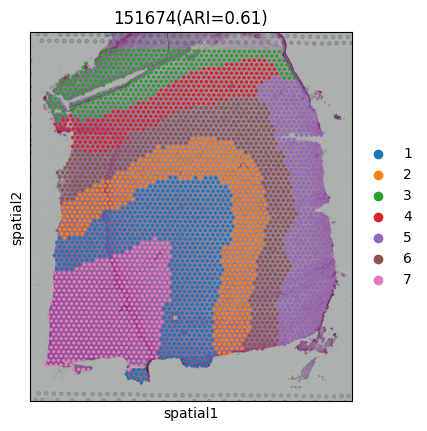

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


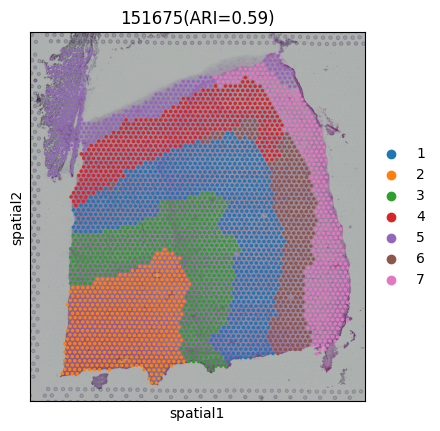

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


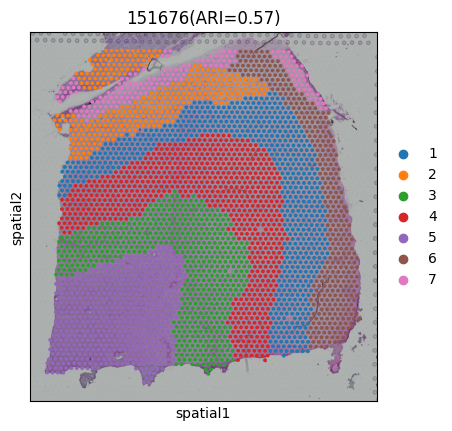

In [10]:
ari = []
from sklearn.metrics import adjusted_rand_score
from MuCoSTX.utils import mclust
n_d = [7,7,7,7,5,5,5,5,7,7,7,7]
for i in range(12):
    adata_i = list_new[i]
    args.n_domain=n_d[i]
    adata_i = mclust(adata_i, args, refine=True, use='mx')
    adata_i = adata_i[~pd.isnull(adata_i.obs['Ground Truth'])]
    obs_df = adata_i.obs.dropna()
    ARI = adjusted_rand_score(obs_df['mclust'], obs_df['Ground Truth'])
    ari.append(ARI)
    sc.pl.spatial(adata_i,color=["mclust"], title=sections[i]+'(ARI=%.2f)'%ARI)

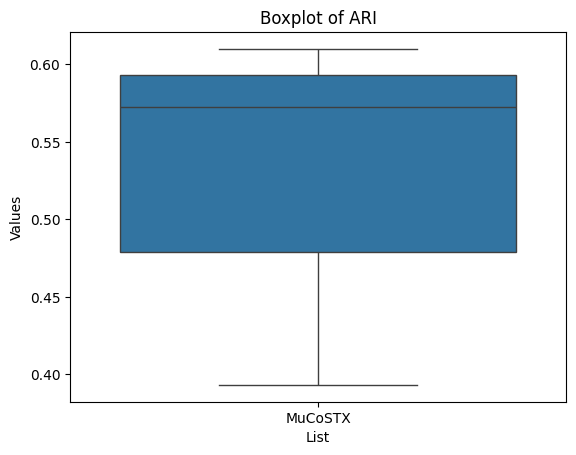

In [11]:
import seaborn as sns
import pandas as pd

# 示例数据：多个列表
data = {
    "MuCoSTX": ari,
}

# 转换为 DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# 转换为长格式
df_melted = df.melt(var_name="List", value_name="Values")

# 绘制箱线图
sns.boxplot(x="List", y="Values", data=df_melted)

# 添加标题
plt.title("Boxplot of ARI")

# 显示图像
plt.show()
